In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from scipy.stats import pearsonr, spearmanr
import h3pandas
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pickle
from warnings import filterwarnings
import matplotlib.colors as colors
import geopandas as gpd 
import sys
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import matplotlib

from plotting_utils import get_color_dict
color_dict = get_color_dict()

filterwarnings('ignore')
tqdm.pandas()

plt.rcParams.update({'font.family':'arial'})



In [11]:




for niche in color_dict.keys():
    
    # load cue data
    data = pd.read_csv(f'../../data/D07.BYM2_summary/modeling_data_with_posterior_est_niche_{niche}_env_tmin.csv')
    raise
    

RuntimeError: No active exception to reraise

In [15]:
data.groupby('h3_02').count()


,mean_DOY_max,std_DOY_max,mean_DOY_peak,std_DOY_peak,lng,lat,source_model,season,year,niche_or_level,...,std_expected_trace_by_tmax,mean_expected_trace_by_tmin,std_expected_trace_by_tmin,geometry,centered_mu_ARR,centered_mean_expected_trace_by_tmin,env_date_mean,env_date_std,arrival_true_mean,arrival_true_std
h3_02,,,,,,,,,,,,,,,,,,,,,
820007fffffffff,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
82001ffffffffff,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
820027fffffffff,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
82002ffffffffff,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
82004ffffffffff,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827af7fffffffff,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
828297fffffffff,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
82829ffffffffff,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [20]:
from scipy.stats import pearsonr

def calc(x):
    
    if len(x) < 3:
        return None
    else:
        r, p = pearsonr(x['mean_expected_trace_by_tmin'], x['mean_expected_trace_by_delta_NDVI'])
        return r

data.dropna(subset=['mean_expected_trace_by_tmin','mean_expected_trace_by_delta_NDVI']).groupby('h3_02').apply(calc).mean()



0.5005512059722922

In [21]:
from scipy.stats import pearsonr

def calc(x):
    
    if len(x) < 3:
        return None
    else:
        r, p = pearsonr(x['mean_DOY_peak'], x['mean_expected_trace_by_delta_NDVI'])
        return r

data.dropna(subset=['mean_DOY_peak','mean_expected_trace_by_delta_NDVI']).groupby('h3_02').apply(calc).mean()


0.5594420436459551

In [22]:
from scipy.stats import pearsonr

def calc(x):
    
    if len(x) < 3:
        return None
    else:
        r, p = pearsonr(x['mean_DOY_peak'], x['mean_expected_trace_by_tmin'])
        return r

data.dropna(subset=['mean_DOY_peak','mean_expected_trace_by_tmin']).groupby('h3_02').apply(calc).mean()


0.7336658997061042

<Axes: >

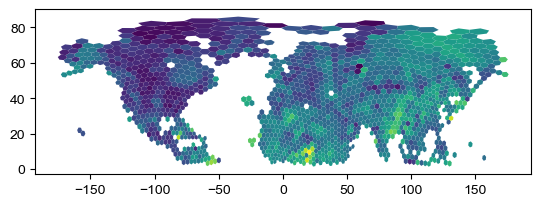

In [10]:
fig, ax
data.groupby('h3_02')[['mean_DOY_peak']].mean().h3.h3_to_geo_boundary().plot('mean_DOY_peak')
data.groupby('h3_02')[['mean_DOY_peak']].std().h3.h3_to_geo_boundary().plot('mean_DOY_peak')


<Axes: >

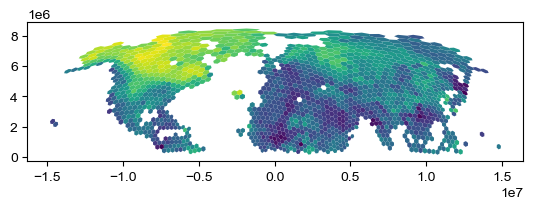

In [35]:
tmp = data.groupby('h3_02')[['mean_DOY_peak']].mean().h3.h3_to_geo_boundary().to_crs('ESRI:54030')

tmp.plot('mean_DOY_peak')
